<a href="https://colab.research.google.com/github/artificialcoder02/Vgg16_Image_Classifier/blob/main/vgg16_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


#Importing Libraries

In [6]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [8]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
ROOT_PATH='/content/drive/MyDrive/cats_and_dogs'

In [13]:
!pwd

/content


In [14]:
import os 
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/cats_and_dogs'

#Resizing all images

In [15]:
IMAGE_SIZE=[224,224]

In [16]:
train_path='/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/train'
valid_path='/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/test'

#Importing VGG16 library and add preprocesing layer in front of the VGG16.
#Here we will se ImageNet weights

In [17]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

In [18]:
for layers in vgg16.layers:
  print(layers)

###Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [19]:
for layer in vgg16.layers:
  layer.trainable=False

In [20]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


#Vgg16 Model Summary

In [22]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Building the Final Model 


In [23]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='Softmax'))


#View the structure of final model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


#Specifying the Cost and Optimization Methods

In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

#Using the Image Data Generator to import images from dataset

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
!pwd

/content/drive/MyDrive/cats_and_dogs


In [32]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/validation',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


Found 1000 images belonging to 2 classes.


In [33]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/validation',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1000 images belonging to 2 classes.


#Model Fitting

In [36]:
r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
32/32 [==============================] - 1343s 42s/step - loss: 1.7135 - accuracy: 0.6260 - val_loss: 0.3267 - val_accuracy: 0.8560
Epoch 2/10
32/32 [==============================] - 1328s 42s/step - loss: 0.3022 - accuracy: 0.8720 - val_loss: 0.2386 - val_accuracy: 0.9140
Epoch 3/10
32/32 [==============================] - 1327s 42s/step - loss: 0.2388 - accuracy: 0.9080 - val_loss: 0.1912 - val_accuracy: 0.9360
Epoch 4/10
32/32 [==============================] - 1385s 44s/step - loss: 0.1944 - accuracy: 0.9260 - val_loss: 0.1488 - val_accuracy: 0.9550
Epoch 5/10
32/32 [==============================] - 1487s 47s/step - loss: 0.1735 - accuracy: 0.9420 - val_loss: 0.1232 - val_accuracy: 0.9610
Epoch 6/10
32/32 [==============================] - 1276s 40s/step - loss: 0.1594 - accuracy: 0.9410 - val_loss: 0.1104 - val_accuracy: 0.9590
Epoch 7/10
32/32 [==============================] - 1323s 42s/step - loss: 0.1044 - accuracy: 0.9660 - val_loss: 0.0840 - val_accuracy: 0.9790

#Plotting the Losses

In [37]:
import matplotlib.pyplot as plt

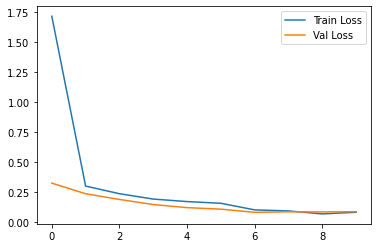

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plotting Accuracy 


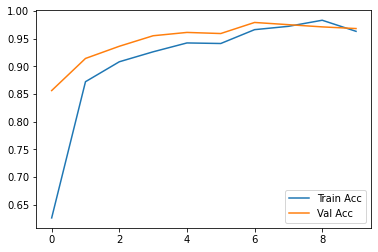

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Saving the File as .h5 Type


In [41]:
from tensorflow.keras.models import load_model 
model.save('model_vgg16.h5')

#Predictions

In [42]:
y_pred=model.predict(test_set)


32/32 [==============================] - 646s 20s/step


In [43]:
y_pred

array([[9.9832577e-01, 1.6741697e-03],
       [9.9874228e-01, 1.2578012e-03],
       [8.6660334e-04, 9.9913335e-01],
       ...,
       [4.9327421e-03, 9.9506718e-01],
       [1.8144242e-02, 9.8185569e-01],
       [8.0379206e-05, 9.9991959e-01]], dtype=float32)

In [44]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [45]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [46]:
from tensorflow.keras.preprocessing import image


In [57]:
model=load_model('model_vgg16.h5')
img=image.load_img('/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/validation/cats/cat.2000.jpg',target_size=(224,224))


In [58]:
x=image.img_to_array(img)

In [59]:
Z=plt.imread('/content/drive/MyDrive/cats_and_dogs/cats_and_dogs/validation/cats/cat.2000.jpg')

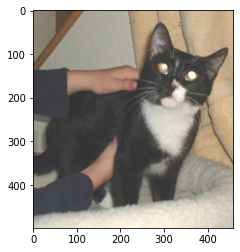

In [60]:
plt.imshow(Z)

In [61]:
x.shape


(224, 224, 3)

In [62]:
x=x/255

In [63]:
from keras.applications.vgg16 import preprocess_input 

In [64]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [65]:
model.predict(img_data)

1/1 [==============================] - 1s 693ms/step


array([[9.9926478e-01, 7.3516247e-04]], dtype=float32)

In [66]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 1s 1s/step


In [67]:
result

array([0])

In [68]:
if result[0] == 1:
  prediction = "Dog"
  print(prediction)
else:
  prediction="cat"
  print(prediction)
  

cat
